# Challenge Telecom part 1
Nombre : Pablo Gonzalez

#### Extraccion

In [6]:
#Realizamos los pasos de Extraccion, Transformacion y Carga (ETL) de los datos
import pandas as pd
import json
import os


# Abrir el archivo como texto y cargarlo como objeto JSON
with open('TelecomX_Data.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

# Normalizar el JSON anidado
df = pd.json_normalize(data)
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [63]:
df['customerID'].duplicated().sum()  # Verificar si hay IDs duplicados

np.int64(0)

In [9]:
#vemos los tipos de datos de cada columna o df.dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

#mantenemos las columnas que nos interesan  

✔️ Muy importantes: Churn, tenure, Contract, Charges.Monthly, InternetService.

✔️ Relevantes: SeniorCitizen, Partner, Dependents, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, PaymentMethod, Charges.Total

In [129]:
dataframe = df[['Churn', 'customer.tenure', 'account.Contract', 'account.Charges.Monthly', 'internet.InternetService',
               'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'internet.OnlineSecurity',
                'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport',
                'account.PaymentMethod', 'account.Charges.Total']].copy()

In [130]:
dataframe

,Churn,customer.tenure,account.Contract,account.Charges.Monthly,internet.InternetService,customer.SeniorCitizen,customer.Partner,customer.Dependents,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,account.PaymentMethod,account.Charges.Total
0,No,9,One year,65.60,DSL,0,Yes,Yes,No,Yes,No,Yes,Mailed check,593.3
1,No,9,Month-to-month,59.90,DSL,0,No,No,No,No,No,No,Mailed check,542.4
2,Yes,4,Month-to-month,73.90,Fiber optic,0,No,No,No,No,Yes,No,Electronic check,280.85
3,Yes,13,Month-to-month,98.00,Fiber optic,1,Yes,No,No,Yes,Yes,No,Electronic check,1237.85
4,Yes,3,Month-to-month,83.90,Fiber optic,1,Yes,No,No,No,No,Yes,Mailed check,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,No,13,One year,55.15,DSL,0,No,No,Yes,No,No,Yes,Mailed check,742.9
7263,Yes,22,Month-to-month,85.10,Fiber optic,0,Yes,No,No,No,No,No,Electronic check,1873.7
7264,No,2,Month-to-month,50.30,DSL,0,No,No,No,Yes,No,No,Mailed check,92.75
7265,No,67,Two year,67.85,DSL,0,Yes,Yes,Yes,No,Yes,Yes,Mailed check,4627.65


In [131]:
#vemos si existen valores nulos
dataframe.isnull().sum()

Churn                        0
customer.tenure              0
account.Contract             0
account.Charges.Monthly      0
internet.InternetService     0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
account.PaymentMethod        0
account.Charges.Total        0
dtype: int64

In [132]:
#creamos una funcion para renombrar las columnas quitando todo lo que esta antes del punto
def rename_columns(df):
    df.columns = [col.split('.')[-1] for col in df.columns]
    return df

In [133]:
rename_columns(dataframe)

,Churn,tenure,Contract,Monthly,InternetService,SeniorCitizen,Partner,Dependents,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,PaymentMethod,Total
0,No,9,One year,65.60,DSL,0,Yes,Yes,No,Yes,No,Yes,Mailed check,593.3
1,No,9,Month-to-month,59.90,DSL,0,No,No,No,No,No,No,Mailed check,542.4
2,Yes,4,Month-to-month,73.90,Fiber optic,0,No,No,No,No,Yes,No,Electronic check,280.85
3,Yes,13,Month-to-month,98.00,Fiber optic,1,Yes,No,No,Yes,Yes,No,Electronic check,1237.85
4,Yes,3,Month-to-month,83.90,Fiber optic,1,Yes,No,No,No,No,Yes,Mailed check,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,No,13,One year,55.15,DSL,0,No,No,Yes,No,No,Yes,Mailed check,742.9
7263,Yes,22,Month-to-month,85.10,Fiber optic,0,Yes,No,No,No,No,No,Electronic check,1873.7
7264,No,2,Month-to-month,50.30,DSL,0,No,No,No,Yes,No,No,Mailed check,92.75
7265,No,67,Two year,67.85,DSL,0,Yes,Yes,Yes,No,Yes,Yes,Mailed check,4627.65


##### Inconsistencias

In [134]:
#vemos los valores unicos para cada columna
dataframe.nunique()

Churn                  3
tenure                73
Contract               3
Monthly             1585
InternetService        3
SeniorCitizen          2
Partner                2
Dependents             2
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
PaymentMethod          4
Total               6531
dtype: int64

No existen valores nulos, pero si puede haber espacios entonces verificamos con unique los valores de cada columna

In [135]:
#vemos los valores unicos para cada columna
for col in dataframe.columns:
    print(f"{col}: {sorted(dataframe[col].unique())}")

Churn: ['', 'No', 'Yes']
tenure: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26), np.int64(27), np.int64(28), np.int64(29), np.int64(30), np.int64(31), np.int64(32), np.int64(33), np.int64(34), np.int64(35), np.int64(36), np.int64(37), np.int64(38), np.int64(39), np.int64(40), np.int64(41), np.int64(42), np.int64(43), np.int64(44), np.int64(45), np.int64(46), np.int64(47), np.int64(48), np.int64(49), np.int64(50), np.int64(51), np.int64(52), np.int64(53), np.int64(54), np.int64(55), np.int64(56), np.int64(57), np.int64(58), np.int64(59), np.int64(60), np.int64(61), np.int64(62), np.int64(63), np.int64(64), np.int64(65), np.int64(66), np.int64(67), np.int64(68), np.int64(6

#### Transformacion

In [136]:
dataframe['Churn'].value_counts()

Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64

En este caso de la columna Churn hay campos vacios

In [137]:
#eliminamos las filas que continen el espacio en blanco
dataframe = dataframe[dataframe['Churn'] != '']


In [138]:
#comprobamos que hemos borrado los valores vacios
dataframe['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [139]:
dataframe= dataframe[dataframe['Total'] != ' ']
dataframe['Total'].value_counts()

Total
20.2       11
19.75       9
20.05       8
19.9        8
19.65       8
           ..
4018.05     1
633.45      1
742.9       1
4627.65     1
3707.6      1
Name: count, Length: 6530, dtype: int64

Ahora ya no tenemos valores vacios que puedan inferir negativamente en nuestro analisis 

In [140]:
dataframe.dtypes

Churn                object
tenure                int64
Contract             object
Monthly             float64
InternetService      object
SeniorCitizen         int64
Partner              object
Dependents           object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
PaymentMethod        object
Total                object
dtype: object

In [141]:
for col in dataframe.select_dtypes(include='object').columns:
    dataframe[col] = dataframe[col].astype('category')

In [142]:
dataframe.dtypes

Churn               category
tenure                 int64
Contract            category
Monthly              float64
InternetService     category
SeniorCitizen          int64
Partner             category
Dependents          category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
PaymentMethod       category
Total               category
dtype: object

observamos que total paso a category siendo que es un float, y que SeniorCitizen tambien es categorica donde 0 es No y 1 es Yes

In [143]:
dataframe['Total'].value_counts()

Total
20.2      11
19.75      9
19.9       8
20.05      8
19.65      8
          ..
997.75     1
998.1      1
999.45     1
999.8      1
999.9      1
Name: count, Length: 6530, dtype: int64

In [144]:
dataframe['Total']= dataframe['Total'].astype('float64')  # Convertir 'Total' a float64
dataframe['SeniorCitizen'] = dataframe['SeniorCitizen'].astype('category') 

In [145]:
dataframe.dtypes

Churn               category
tenure                 int64
Contract            category
Monthly              float64
InternetService     category
SeniorCitizen       category
Partner             category
Dependents          category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
PaymentMethod       category
Total                float64
dtype: object

##### Agregamos la columna cuentas diarias 


In [146]:
dataframe['Cuentas_Diarias'] = (dataframe['Monthly'] / 30).round(2)  # Agregar columna de cuentas diarias

In [147]:
dataframe.head()

,Churn,tenure,Contract,Monthly,InternetService,SeniorCitizen,Partner,Dependents,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,PaymentMethod,Total,Cuentas_Diarias
0,No,9,One year,65.6,DSL,0,Yes,Yes,No,Yes,No,Yes,Mailed check,593.30,2.19
1,No,9,Month-to-month,59.9,DSL,0,No,No,No,No,No,No,Mailed check,542.40,2.00
2,Yes,4,Month-to-month,73.9,Fiber optic,0,No,No,No,No,Yes,No,Electronic check,280.85,2.46
3,Yes,13,Month-to-month,98.0,Fiber optic,1,Yes,No,No,Yes,Yes,No,Electronic check,1237.85,3.27
4,Yes,3,Month-to-month,83.9,Fiber optic,1,Yes,No,No,No,No,Yes,Mailed check,267.40,2.80


In [150]:
#dataframe['Churn'] = dataframe['Churn'].map({'Yes': 1, 'No': 0})  # Convertir 'Churn' a valores numéricos
dataframe['Partner'] = dataframe['Partner'].map({'Yes': 1, 'No': 0})  # Convertir 'Partner' a valores numéricos
dataframe['Dependents'] = dataframe['Dependents'].map({'Yes': 1, 'No': 0})  # Convertir 'Dependents' a valores numéricos

In [151]:
dataframe.head()

,Churn,tenure,Contract,Monthly,InternetService,SeniorCitizen,Partner,Dependents,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,PaymentMethod,Total,Cuentas_Diarias
0,No,9,One year,65.6,DSL,0,1,1,No,Yes,No,Yes,Mailed check,593.30,2.19
1,No,9,Month-to-month,59.9,DSL,0,0,0,No,No,No,No,Mailed check,542.40,2.00
2,Yes,4,Month-to-month,73.9,Fiber optic,0,0,0,No,No,Yes,No,Electronic check,280.85,2.46
3,Yes,13,Month-to-month,98.0,Fiber optic,1,1,0,No,Yes,Yes,No,Electronic check,1237.85,3.27
4,Yes,3,Month-to-month,83.9,Fiber optic,1,1,0,No,No,No,Yes,Mailed check,267.40,2.80


In [152]:
dataframe['Churn']= dataframe['Churn'].map({'Yes': 1, 'No': 0})  # Convertir 'Churn' a valores numéricos

#### Carga y Analisis

Para comenzar, realiza un análisis descriptivo de los datos, calculando métricas como media, mediana, desviación estándar y otras medidas que ayuden a comprender mejor la distribución y el comportamiento de los clientes.

In [153]:
dataframe.describe()

,tenure,Monthly,Total,Cuentas_Diarias
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441,2.159891
std,24.545260,30.085974,2266.771362,1.002955
min,1.000000,18.250000,18.800000,0.610000
25%,9.000000,35.587500,401.450000,1.187500
50%,29.000000,70.350000,1397.475000,2.340000
75%,55.000000,89.862500,3794.737500,2.992500
max,72.000000,118.750000,8684.800000,3.960000


🔹 Análisis Exploratorio de Datos:

Cómo está distribuida la variable "churn" (evasión) entre los clientes. Utiliza gráficos para visualizar la proporción de clientes que permanecieron y los que se dieron de baja.

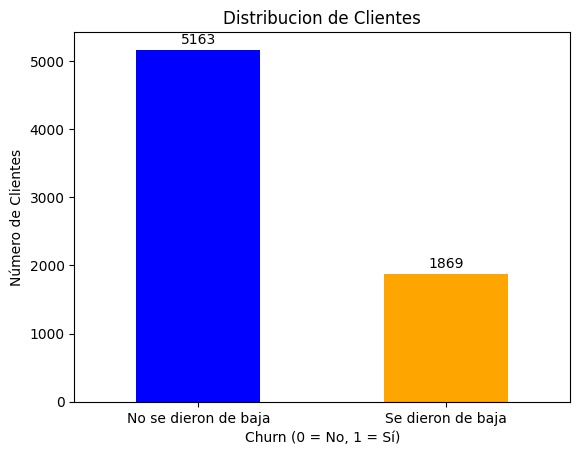

In [160]:
#Generamos un grafico de distrubucion de porcentajes de clientes que permanecieron y los que se dieron de baja
import matplotlib.pyplot as plt

labels = ['No se dieron de baja', 'Se dieron de baja']
dataframe['Churn'].value_counts().sort_index().plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribucion de Clientes')
plt.xlabel('Churn (0 = No, 1 = Sí)')
plt.ylabel('Número de Clientes')
plt.xticks([0, 1], labels, rotation=0)
#ponemos el valor encima de cada barra
for i, v in enumerate(dataframe['Churn'].value_counts().sort_index()):
    plt.text(i, v + 50, str(v), ha='center', va='bottom', fontsize=10)
plt.show()

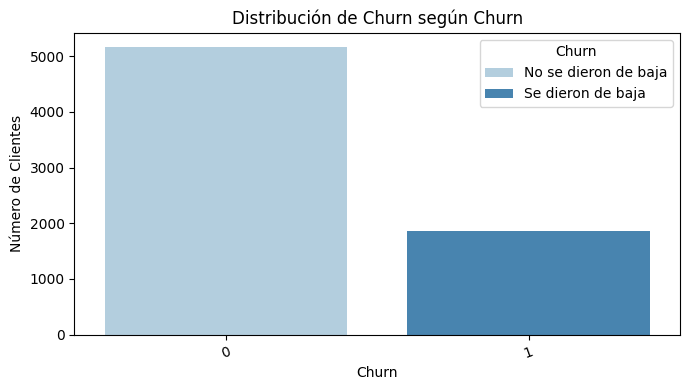

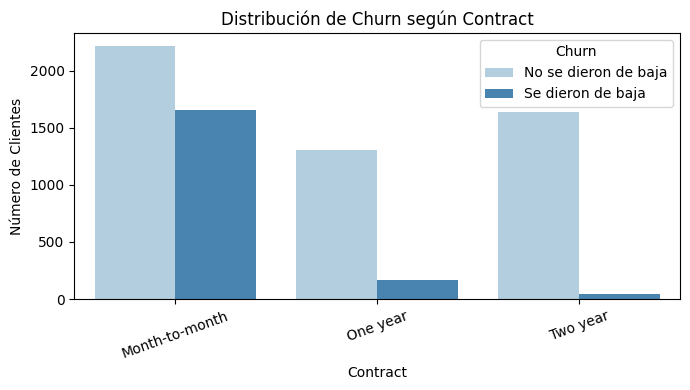

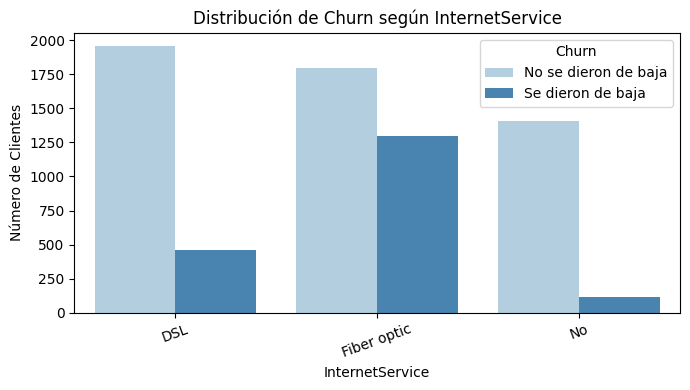

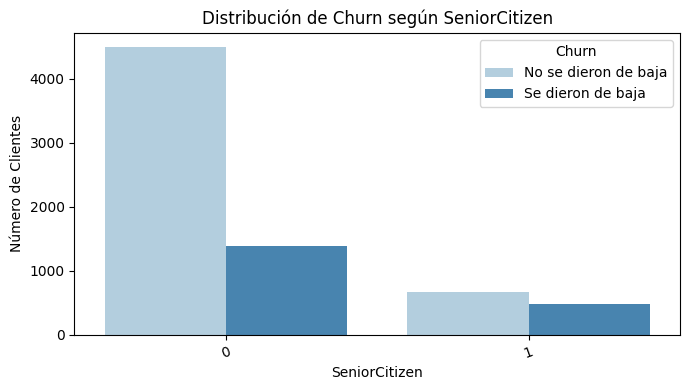

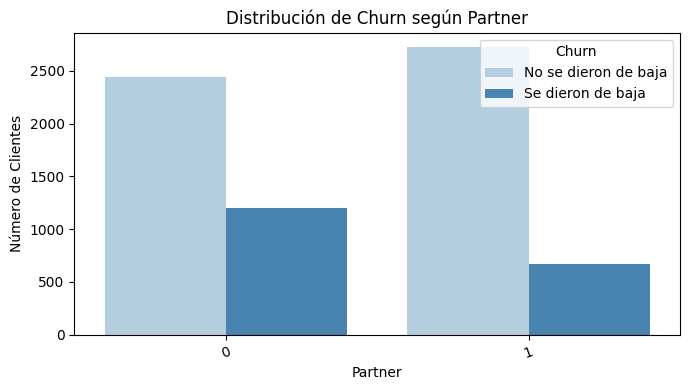

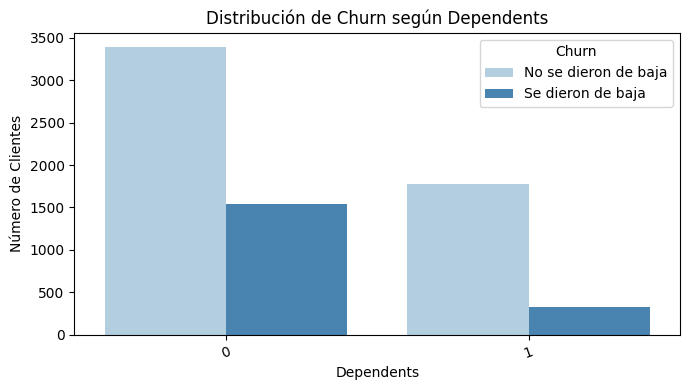

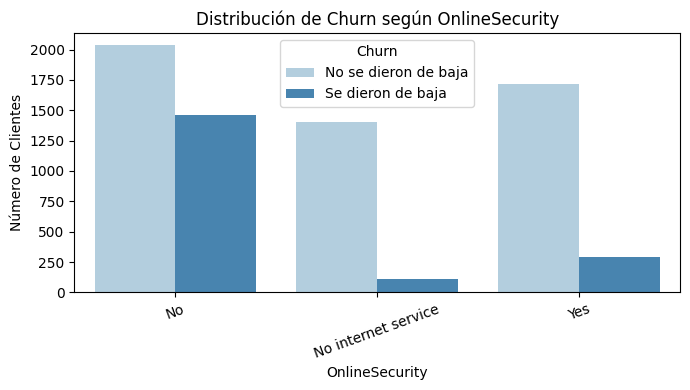

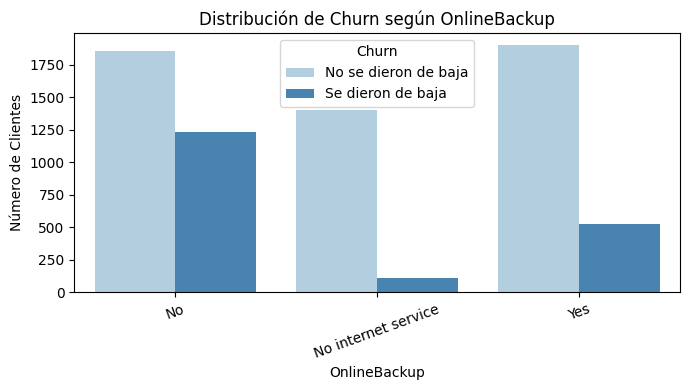

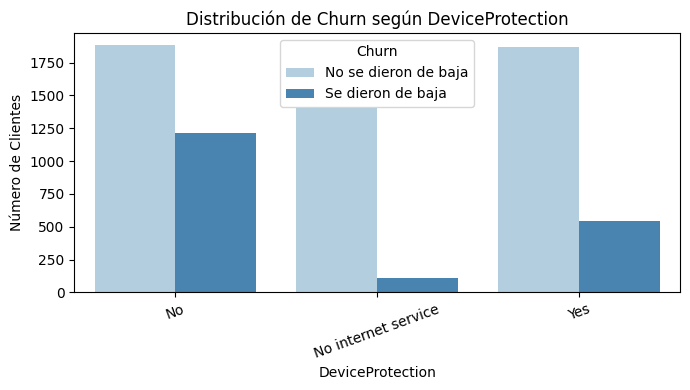

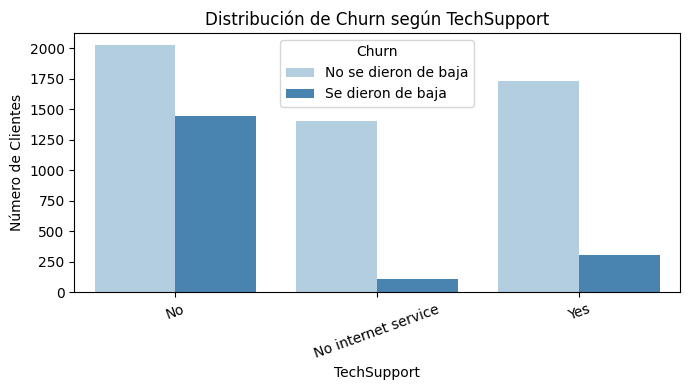

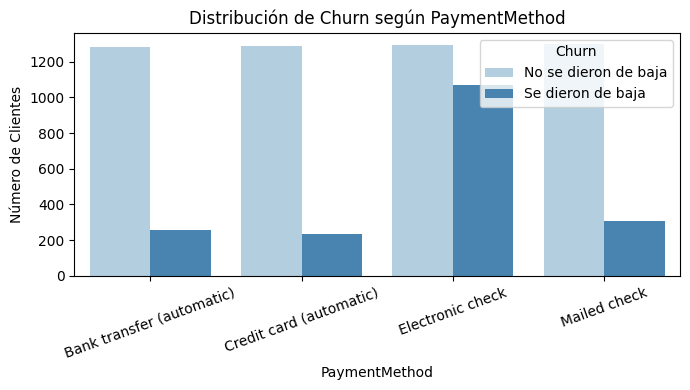

In [183]:
#Ahora vemos como se distribuye la variable evasion segun variables categoricas
import seaborn as sns
import matplotlib.pyplot as plt

#categoricas = ['Contract', 'PaymentMethod', 'InternetService', 'Partner', 'Dependents','SeniorCitizen','']
cat_cols = dataframe.select_dtypes(include='category').columns.tolist()

for col in cat_cols:
    plt.figure(figsize=(7,4))
    sns.countplot(data=dataframe, x=col, hue='Churn', palette='Blues')
    plt.title(f'Distribución de Churn según {col}')
    plt.xlabel(col)
    plt.ylabel('Número de Clientes')
    plt.legend(title='Churn', labels=['No se dieron de baja', 'Se dieron de baja'])
    plt.xticks(rotation=20)
    plt.tight_layout()
    plt.show()

aqui vemos que existe una cantidad casi igual de senior citizen que se de dan de baja con respecto a los que no se van para sacar un porcentaje numerico creamos un grafico que nos permita visualizar el porentaje

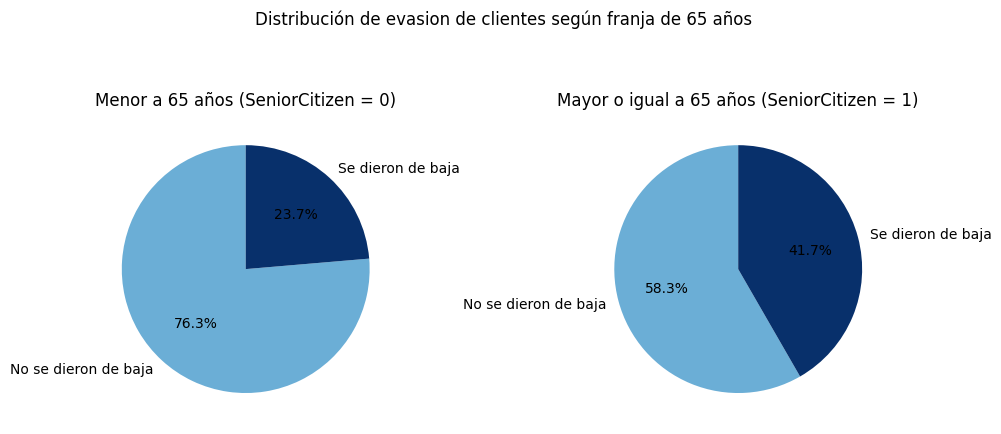

In [181]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

for i, group in enumerate([0, 1]):
    datos = dataframe[dataframe['SeniorCitizen'] == group]['Churn'].value_counts().sort_index()
    labels = ['No se dieron de baja', 'Se dieron de baja']
    colors = ['#6baed6', '#08306b']
    axes[i].pie(datos, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
    if i == 0:
        axes[i].set_title(f'Menor a 65 años (SeniorCitizen = {group})')
    else:
        axes[i].set_title(f'Mayor o igual a 65 años (SeniorCitizen = {group})')

plt.suptitle('Distribución de evasion de clientes según franja de 65 años')
plt.tight_layout()
plt.show()

C:\Users\pgsan\AppData\Local\Temp\ipykernel_13432\569582897.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataframe, x='Churn', y=col, palette='Blues')


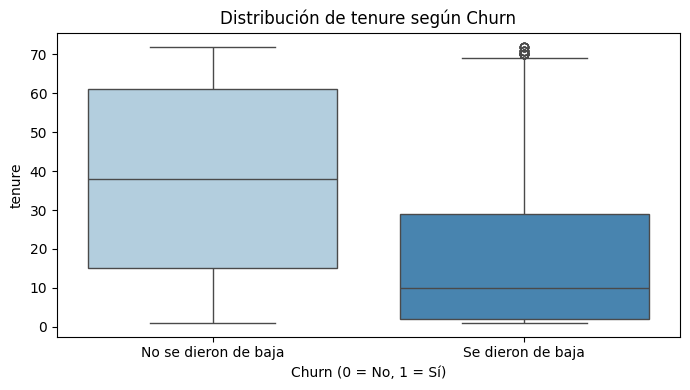

C:\Users\pgsan\AppData\Local\Temp\ipykernel_13432\569582897.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataframe, x='Churn', y=col, palette='Blues')


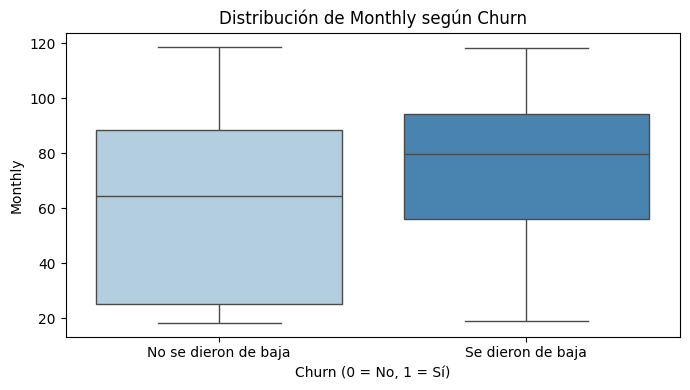

C:\Users\pgsan\AppData\Local\Temp\ipykernel_13432\569582897.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataframe, x='Churn', y=col, palette='Blues')


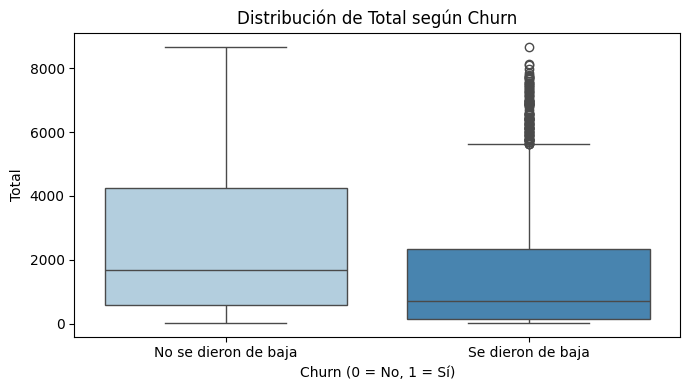

C:\Users\pgsan\AppData\Local\Temp\ipykernel_13432\569582897.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataframe, x='Churn', y=col, palette='Blues')


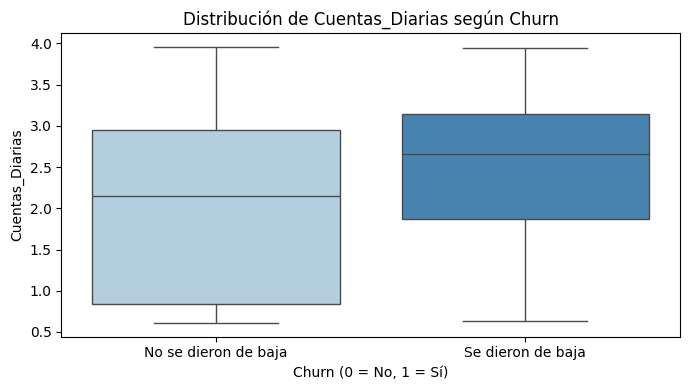

In [172]:
import seaborn as sns
import matplotlib.pyplot as plt

numericas = ['tenure', 'Monthly', 'Total', 'Cuentas_Diarias']

for col in numericas:
    plt.figure(figsize=(7,4))
    sns.boxplot(data=dataframe, x='Churn', y=col, palette='Blues')
    plt.title(f'Distribución de {col} según Churn')
    plt.xlabel('Churn (0 = No, 1 = Sí)')
    plt.ylabel(col)
    plt.xticks([0, 1], ['No se dieron de baja', 'Se dieron de baja'])
    plt.tight_layout()
    plt.show()

#### Informe Final

- Introducción: El objetivo de este analisis es determinar cuales serian los factores mas importantes por lo cual los clientes se dan de baja teniendo en cuenta variables categoricas y numericas relacionadas

🔹 Limpieza y Tratamiento de Datos: Extraccion de los datos desde un json y su posterior normalizacion para convertirla a dataframe, exploracion del tipo de datos, se constato que existian valores vacios en la columna churn, la accion correctiva fue la eliminacion de dichas filas. Tambien entre los valores totales existian campos vacios al ser la proporcion muy pequeña estos se podian eliminar sin afectar el analisis.

🔹 Análisis Exploratorio de Datos: Los analisis realizados son distribucion de evasion de clientes en proporcion mediante un grafico de barras, tambien como estan distrubuidos las variables categoricas segun la evasion mediante un grafico de barras para cada campo, 

🔹 Conclusiones e Insights:  
- Evasion seria entre el 25% a 30% del total  
- El riesgo de baja se concentra en clientes nuevos (tenure bajo), con contrato mensual, cargos mensuales altos, Internet por fibra, sin servicios adicionales (seguridad/backup/soporte) y que pagan con “electronic check”.  
- Mayores de 65 muestran una tasa de churn sensiblemente más alta (~42%) que los menores (~24%)  

Hallazgos clave:  

- Contrato: Month-to-month es un motivo de evasion; 1 y 2 años retienen mucho mejor.

- InternetService: En Fiber optic la evasion es sustancialmente mayor que en DSL y que en “No internet service”.

- Servicios adicionales: Cuando el cliente sí tiene OnlineSecurity / OnlineBackup / DeviceProtection / TechSupport, la evasion disminuye de forma marcada.

- PaymentMethod: Electronic check concentra mucha evasion; autopago con tarjeta o transferencia muestra abandono bajo.

- SeniorCitizen: Mayor propensión a baja (ver tortas por franja).

- Partner / Dependents: Tener pareja/dependientes se asocia con menor evasion.

- Tenure: los que se dan de baja tienen antigüedad muy baja (mediana ~ pocos meses) vs ~3+ años en los que permanecen.

- MonthlyCharges: los que se dan de baja tienden a pagar más por mes.

- TotalCharges: es menor en quienes se dan de baja (efecto de menor tenure).

- Cuentas_Diarias: ligera mayor mediana en churn; podría reflejar complejidad/roce de uso.

🔹 Recomendaciones: Ofrece sugerencias estratégicas basadas en tu análisis.

1. Migración de contrato: campaña para pasar month-to-month → 1 año, con descuento por 3–6 meses, bono por autopago y cancelación flexible (ventana de gracia).

2. Empaquetar Internet + OnlineSecurity/Backup/Soporte con pequeño descuento con el objetivo de elevar adopción de add-ons en fibra.

3. Incentivar autopago (tarjeta/transferencia) con beneficio mensual; desincentivar electronic check.

4. Alertas de “bill shock” y revisión de plan para clientes con Monthly alto.

5. Programa senior: canal de soporte dedicado, guía simplificada, y tech support gratuito 3 meses.

6. Fibra en foco, posible servicio deficiente de fibra: revisar reclamos de fibra (instalación, estabilidad, precio); lanzar plan fidelidad fibra con upgrade temporal de velocidad.

7. Lista semanal de alto gasto que amagan baja (outliers del “Total”): contacto proactivo y oferta personalizada.